### The general idea behind web scraping is to retrieve data that exists on a website, and convert it into a format that is usable for analysis. Webpages are rendered by the browser from HTML and CSS code.

### Module Requests can be used to send all kinds of HTTP (The Hypertext Transfer Protocol) requests from passing parameters in URLs,Uniform Resource Locator i.e. internat address to sending custom headers and SSL Verification and a reference to a web resource that specifies its location on a computer network

### What is HTML?

### HTML is the standard markup language for creating Web pages.

### HTML stands for Hyper Text Markup Language
### HTML describes the structure of Web pages using markup
### HTML elements are the building blocks of HTML pages
### HTML elements are represented by tags
### HTML tags label pieces of content such as "heading", "paragraph", "table", and so on
### Browsers do not display the HTML tags, but use them to render the content of the page

### HTML Tags
### HTML tags are element names surrounded by angle brackets:

### HTML tags normally come in pairs like

### The first tag in a pair is the start tag, the second tag is the end tag
### The end tag is written like the start tag, but with a forward slash inserted before the tag name

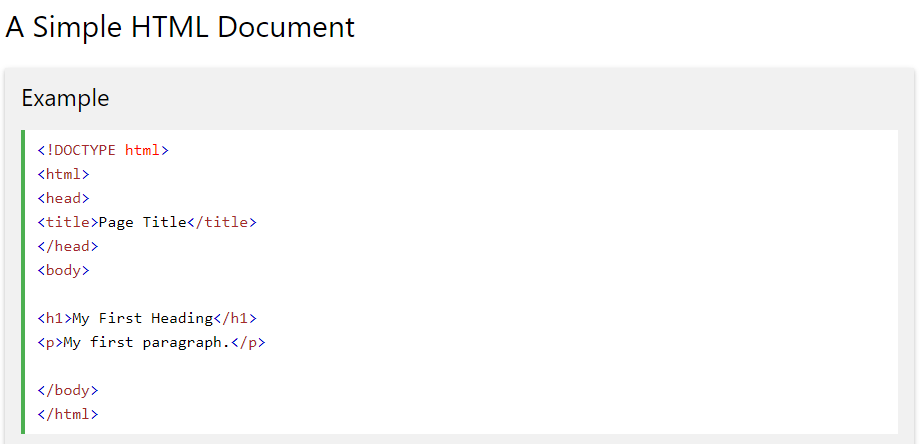

In [1]:
from IPython.display import Image
Image('HTML2.png')

### HTML Attributes
### All HTML elements can have attributes
### Attributes provide additional information about an element
### Attributes are always specified in the start tag
### Attributes usually come in name/value pairs like: name="value"

### The title attribute provides additional "tool-tip" information
### The href attribute provides address information for links
### The width and height attributes provide size information for images
### Always use lowercase attribute names
### Always quote attribute values with double quotes

### Web Browsers
### The purpose of a web browser (Chrome, IE, Firefox, Safari) is to read HTML documents and display them.
### The browser does not display the HTML tags, but uses them to determine how to display the document:

In [2]:
import requests
from bs4 import BeautifulSoup

### Beautiful Soup is essentially a set of wrapper functions that make it simple to select common HTML elements. The BeautifulSoup object can accept two arguments.  The first argument is the actual markup, and the second argument is the parser that you want to use. The different parsers are: html.parser, lxml, and html5lib. The lxml parser has two versions, an HTML parser and an XML parse


### The lxml parser is very fast and can be used to quickly parse given HTML. On the other hand, the html5lib parser is very slow, but it is also extremely lenient

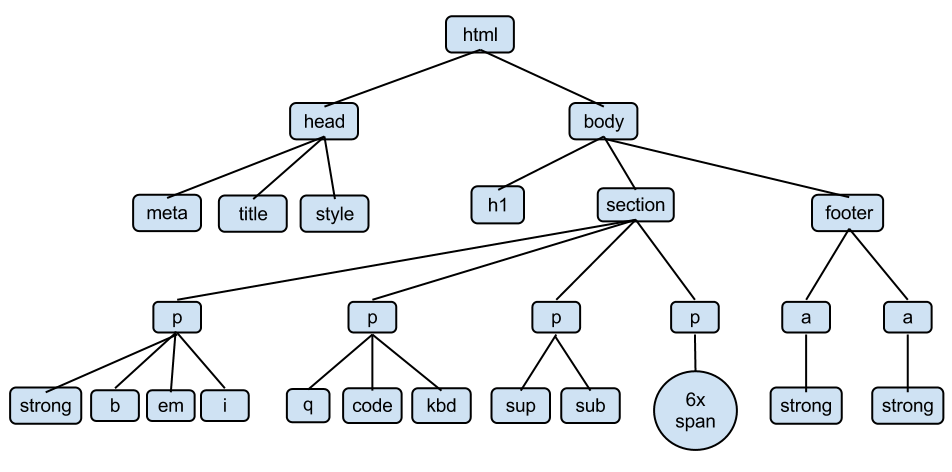

In [3]:
from IPython.display import Image
Image('HTML.png')

### All the information about our request is now stored in a Response object called req.

In [4]:
req = requests.get('https://en.wikipedia.org/wiki/Belt_and_Road_Initiative')
soup = BeautifulSoup(req.text, "lxml")

### Getting the Title of the webpage

In [5]:
soup.title

<title>Belt and Road Initiative - Wikipedia</title>

In [6]:
soup.title.name

'title'

In [7]:
soup.title.string

'Belt and Road Initiative - Wikipedia'

### Scraping the webpage for other information like the main heading or the first paragraph, their classes or their attribute

### class specifies one or more classnames for all HTML elements

### id specifies a unique id for an html element

In [8]:
soup.h1

<h1 class="firstHeading" id="firstHeading" lang="en">Belt and Road Initiative</h1>

In [9]:
soup.h1.string

'Belt and Road Initiative'

In [10]:
soup.h1['class']

['firstHeading']

In [11]:
soup.h1['id']

'firstHeading'

In [12]:
soup.h1['lang']

'en'

In [13]:
soup.h1.attrs

{'class': ['firstHeading'], 'id': 'firstHeading', 'lang': 'en'}

### Tag "a" defines a hyperlink, which is used to link from one page to another.

### The most important attribute of the tag "a" element is the href attribute, which indicates the link's destination.

In [14]:
soup.p.find_all('a')

[<a href="/wiki/China" title="China">China</a>,
 <a href="/wiki/Paramount_leader" title="Paramount leader">paramount leader</a>,
 <a href="/wiki/Xi_Jinping" title="Xi Jinping">Xi Jinping</a>,
 <a class="mw-redirect" href="/wiki/People%27s_Republic_of_China" title="People's Republic of China">People's Republic of China</a>,
 <a href="/wiki/Silk_Road_Economic_Belt" title="Silk Road Economic Belt">Silk Road Economic Belt</a>,
 <a href="/wiki/Maritime_Silk_Road" title="Maritime Silk Road">Maritime Silk Road</a>,
 <a href="/wiki/Steel_industry_in_China" title="Steel industry in China">steel manufacturing</a>,
 <a href="#cite_note-caixin100761304-1">[1]</a>,
 <a href="#cite_note-2">[2]</a>,
 <a href="/wiki/Premier_of_the_People%27s_Republic_of_China" title="Premier of the People's Republic of China">Chinese Premier</a>,
 <a href="/wiki/Li_Keqiang" title="Li Keqiang">Li Keqiang</a>,
 <a href="/wiki/State_visit" title="State visit">State visit</a>,
 <a href="/wiki/Asia" title="Asia">Asia</a>,


In [15]:
for sub_heading in soup.find_all('h2'):
    print(sub_heading.text)

Contents
Vision[edit]
Infrastructure networks[edit]
Financial institutions[edit]
The Geoeconomics of continental integration[edit]
Culture and education[edit]
Oversight[edit]
Motivation and controversy[edit]
See also[edit]
Further reading[edit]
References[edit]
External links[edit]
Navigation menu


### Accessing all the children of a tag as a list

In [16]:
print(soup.p.contents)

[<b>The Silk Road Economic Belt and the 21st-century Maritime Silk Road</b>, ', also known as the ', <b>Belt and Road Initiative</b>, ' (', <b>B&amp;R</b>, ') and ', <b>The Belt and Road</b>, ' (', <b>B&amp;R</b>, '), is a development strategy proposed by ', <a href="/wiki/China" title="China">China</a>, "'s ", <a href="/wiki/Paramount_leader" title="Paramount leader">paramount leader</a>, ' ', <a href="/wiki/Xi_Jinping" title="Xi Jinping">Xi Jinping</a>, ' that focuses on connectivity and cooperation between Eurasian countries, primarily the ', <a class="mw-redirect" href="/wiki/People%27s_Republic_of_China" title="People's Republic of China">People's Republic of China</a>, ', the land-based "', <a href="/wiki/Silk_Road_Economic_Belt" title="Silk Road Economic Belt">Silk Road Economic Belt</a>, '" (SREB) and the oceangoing "', <a href="/wiki/Maritime_Silk_Road" title="Maritime Silk Road">Maritime Silk Road</a>, '" (MSR). The strategy underlines China\'s push to take a larger role in g

In [17]:
print(soup.p.contents[0])

<b>The Silk Road Economic Belt and the 21st-century Maritime Silk Road</b>


In [18]:
print(soup.p.contents[1])

, also known as the 


In [19]:
print(soup.p.contents[10])

<a href="/wiki/China" title="China">China</a>


In [20]:
for heading in soup.find_all(["h1", "h2", "h3", "h4", "h5", "h6"]):
    print(heading.name + ' ' + heading.text.strip())

h1 Belt and Road Initiative
h2 Contents
h2 Vision[edit]
h2 Infrastructure networks[edit]
h3 Bridging the 'infrastructure gap' in Asia and beyond[edit]
h3 Silk Road Economic Belt[edit]
h3 Maritime Silk Road[edit]
h4 East Africa[edit]
h3 Closely related networks[edit]
h3 China–Pakistan Economic Corridor (CPEC)[edit]
h2 Financial institutions[edit]
h3 AIIB[edit]
h3 Silk Road Fund[edit]
h2 The Geoeconomics of continental integration[edit]
h3 A new kind of multilateralism[edit]
h3 Leveraging China’s infrastructure excellence[edit]
h2 Culture and education[edit]
h3 University Alliance of the Silk Road[edit]
h2 Oversight[edit]
h2 Motivation and controversy[edit]
h3 Motivation[edit]
h3 In Hong Kong[edit]
h2 See also[edit]
h2 Further reading[edit]
h2 References[edit]
h2 External links[edit]
h2 Navigation menu
h3 Personal tools
h3 Namespaces
h3 Variants
h3 Views
h3 More
h3 Search
h3 Navigation
h3 Interaction
h3 Tools
h3 Print/export
h3 Languages


In [21]:
len(soup.find_all(True))  # HHow many numbers of attributes
# 4339

1900

### Find all tag contains "Belt"

In [22]:
import re # Regular expression

In [23]:
len(soup.find_all(href=re.compile("Belt")))

76

### Find all tag contains "Road"

In [24]:
len(soup.find_all(href=re.compile("Road")))

86

In [25]:
# The <href> tag specifies the URL of the page the link goes to

# The <div> tag defines a division or a section in an HTML document

# The <dir> tag is used to list directory titles.

# The <frame> tag defines one particular window (frame) within a <frameset>

# The <h1> to <h6> tags are used to define HTML headings.

# The <p> tag defines a paragraph.

# The <b> tag specifies bold text.

# The <a> tag defines a hyperlink, which is used to link from one page to another

# The <i> tag defines a part of text in an alternate voice or mood
